In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
import cv2
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using Theano backend.


In [2]:
TAKE_FIRST = 150

blurred_imgs = []

for path in glob("blur_detection/CERTH_ImageBlurDataset/TrainingSet/Artificially-Blurred/*")[:TAKE_FIRST]:
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (512, 512))
    blurred_imgs.append(img)

blurred_imgs = np.stack(blurred_imgs)

sharp_imgs = []

for path in glob("blur_detection/CERTH_ImageBlurDataset/TrainingSet/Undistorted/*")[:TAKE_FIRST]:
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (512, 512))
    sharp_imgs.append(img)

sharp_imgs = np.stack(sharp_imgs)

print(blurred_imgs.shape)
print(sharp_imgs.shape)

(150, 512, 512)
(150, 512, 512)


In [4]:
X_train = np.concatenate((blurred_imgs, sharp_imgs)).astype(np.float64)[..., np.newaxis] / 255
y_train = np.zeros((len(X_train), 2))
y_train[:len(blurred_imgs), 0] = 1
y_train[len(blurred_imgs):, 1] = 1

idxs = np.random.permutation(len(X_train))
split = int(0.7 * len(X_train))

X_test = X_train[idxs[split:]]
y_test = y_train[idxs[split:]]

X_train = X_train[idxs[:split]]
y_train = y_train[idxs[:split]]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(210, 512, 512, 1) (210, 2) (90, 512, 512, 1) (90, 2)


[0. 1.]


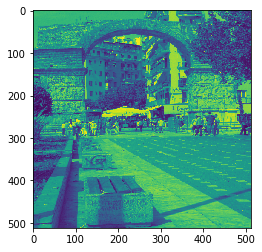

In [6]:
plt.imshow(X_train[0, :, :, 0])
print(y_train[0])
plt.show()

In [16]:
model = Sequential()
model.add(Conv2D(5, (3, 3), input_shape=(512, 512, 1), border_mode='same'))
model.add(MaxPooling2D(pool_size=(25, 25)))
model.add(MaxPooling2D(pool_size=(5, 5)))

model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))


model.compile(loss="binary_crossentropy",
                      optimizer="adam",
                      metrics=['accuracy'])

/home/me/.virtualenvs/imgproc/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(5, (3, 3), input_shape=(512, 512,..., padding="same")`
  


In [17]:
checkpointer = ModelCheckpoint(filepath="model.hdf5", verbose=1,
                                       save_best_only=True, save_weights_only=False)

model.fit(X_train, y_train,
          epochs=100,
          batch_size=40,
          shuffle=True,
          verbose=2,
          validation_split=1 - 0.6,
          callbacks=[checkpointer])

Train on 126 samples, validate on 84 samples
Epoch 1/100


 - 5s - loss: 0.6953 - acc: 0.5000 - val_loss: 0.6813 - val_acc: 0.4643



Epoch 00001: val_loss improved from inf to 0.68130, saving model to model.hdf5
Epoch 2/100


 - 5s - loss: 0.6891 - acc: 0.5079 - val_loss: 0.6735 - val_acc: 0.5000



Epoch 00002: val_loss improved from 0.68130 to 0.67353, saving model to model.hdf5
Epoch 3/100


 - 5s - loss: 0.6731 - acc: 0.5714 - val_loss: 0.6656 - val_acc: 0.5833



Epoch 00003: val_loss improved from 0.67353 to 0.66558, saving model to model.hdf5
Epoch 4/100


 - 5s - loss: 0.6636 - acc: 0.6349 - val_loss: 0.6572 - val_acc: 0.6786



Epoch 00004: val_loss improved from 0.66558 to 0.65722, saving model to model.hdf5
Epoch 5/100


 - 5s - loss: 0.6509 - acc: 0.6905 - val_loss: 0.6487 - val_acc: 0.7143



Epoch 00005: val_loss improved from 0.65722 to 0.64867, saving model to model.hdf5
Epoch 6/100


 - 5s - loss: 0.6451 - acc: 0.7619 - val_loss: 0.6403 - val_acc: 0.7381



Epoch 00006: val_loss improved from 0.64867 to 0.64030, saving model to model.hdf5
Epoch 7/100


 - 5s - loss: 0.6272 - acc: 0.7222 - val_loss: 0.6312 - val_acc: 0.7857



Epoch 00007: val_loss improved from 0.64030 to 0.63119, saving model to model.hdf5
Epoch 8/100


 - 5s - loss: 0.6227 - acc: 0.7302 - val_loss: 0.6223 - val_acc: 0.7976



Epoch 00008: val_loss improved from 0.63119 to 0.62228, saving model to model.hdf5
Epoch 9/100


 - 5s - loss: 0.6120 - acc: 0.7619 - val_loss: 0.6129 - val_acc: 0.8095



Epoch 00009: val_loss improved from 0.62228 to 0.61285, saving model to model.hdf5
Epoch 10/100


 - 5s - loss: 0.6009 - acc: 0.7698 - val_loss: 0.6034 - val_acc: 0.7857



Epoch 00010: val_loss improved from 0.61285 to 0.60343, saving model to model.hdf5
Epoch 11/100


 - 5s - loss: 0.5991 - acc: 0.8095 - val_loss: 0.5943 - val_acc: 0.7857



Epoch 00011: val_loss improved from 0.60343 to 0.59433, saving model to model.hdf5
Epoch 12/100


 - 5s - loss: 0.5866 - acc: 0.7698 - val_loss: 0.5832 - val_acc: 0.7857



Epoch 00012: val_loss improved from 0.59433 to 0.58318, saving model to model.hdf5
Epoch 13/100


 - 5s - loss: 0.5739 - acc: 0.7937 - val_loss: 0.5724 - val_acc: 0.7976



Epoch 00013: val_loss improved from 0.58318 to 0.57236, saving model to model.hdf5
Epoch 14/100


 - 5s - loss: 0.5607 - acc: 0.8095 - val_loss: 0.5618 - val_acc: 0.7976



Epoch 00014: val_loss improved from 0.57236 to 0.56178, saving model to model.hdf5
Epoch 15/100


 - 5s - loss: 0.5726 - acc: 0.8095 - val_loss: 0.5511 - val_acc: 0.7976



Epoch 00015: val_loss improved from 0.56178 to 0.55111, saving model to model.hdf5
Epoch 16/100


 - 5s - loss: 0.5425 - acc: 0.8095 - val_loss: 0.5402 - val_acc: 0.7976



Epoch 00016: val_loss improved from 0.55111 to 0.54018, saving model to model.hdf5
Epoch 17/100


 - 5s - loss: 0.5206 - acc: 0.8413 - val_loss: 0.5279 - val_acc: 0.7976



Epoch 00017: val_loss improved from 0.54018 to 0.52790, saving model to model.hdf5
Epoch 18/100


 - 5s - loss: 0.5338 - acc: 0.8016 - val_loss: 0.5163 - val_acc: 0.7976



Epoch 00018: val_loss improved from 0.52790 to 0.51628, saving model to model.hdf5
Epoch 19/100


 - 5s - loss: 0.5037 - acc: 0.8254 - val_loss: 0.5059 - val_acc: 0.8095



Epoch 00019: val_loss improved from 0.51628 to 0.50594, saving model to model.hdf5
Epoch 20/100


 - 5s - loss: 0.5047 - acc: 0.8333 - val_loss: 0.4962 - val_acc: 0.8214



Epoch 00020: val_loss improved from 0.50594 to 0.49616, saving model to model.hdf5
Epoch 21/100


 - 5s - loss: 0.4831 - acc: 0.8730 - val_loss: 0.4878 - val_acc: 0.8214



Epoch 00021: val_loss improved from 0.49616 to 0.48779, saving model to model.hdf5
Epoch 22/100


 - 5s - loss: 0.4691 - acc: 0.8413 - val_loss: 0.4796 - val_acc: 0.8571



Epoch 00022: val_loss improved from 0.48779 to 0.47964, saving model to model.hdf5
Epoch 23/100


 - 5s - loss: 0.4739 - acc: 0.8413 - val_loss: 0.4692 - val_acc: 0.8690



Epoch 00023: val_loss improved from 0.47964 to 0.46921, saving model to model.hdf5
Epoch 24/100


 - 5s - loss: 0.4425 - acc: 0.8492 - val_loss: 0.4576 - val_acc: 0.8690



Epoch 00024: val_loss improved from 0.46921 to 0.45764, saving model to model.hdf5
Epoch 25/100


 - 5s - loss: 0.4725 - acc: 0.8492 - val_loss: 0.4494 - val_acc: 0.8810



Epoch 00025: val_loss improved from 0.45764 to 0.44944, saving model to model.hdf5
Epoch 26/100


 - 5s - loss: 0.4500 - acc: 0.8968 - val_loss: 0.4462 - val_acc: 0.8452



Epoch 00026: val_loss improved from 0.44944 to 0.44623, saving model to model.hdf5
Epoch 27/100


 - 5s - loss: 0.4642 - acc: 0.8333 - val_loss: 0.4402 - val_acc: 0.8452



Epoch 00027: val_loss improved from 0.44623 to 0.44021, saving model to model.hdf5
Epoch 28/100


 - 5s - loss: 0.4366 - acc: 0.8651 - val_loss: 0.4239 - val_acc: 0.8690



Epoch 00028: val_loss improved from 0.44021 to 0.42393, saving model to model.hdf5
Epoch 29/100


 - 5s - loss: 0.3983 - acc: 0.8889 - val_loss: 0.4090 - val_acc: 0.8810



Epoch 00029: val_loss improved from 0.42393 to 0.40896, saving model to model.hdf5
Epoch 30/100


 - 5s - loss: 0.3913 - acc: 0.8889 - val_loss: 0.3961 - val_acc: 0.8810



Epoch 00030: val_loss improved from 0.40896 to 0.39612, saving model to model.hdf5
Epoch 31/100


 - 5s - loss: 0.4231 - acc: 0.8413 - val_loss: 0.3847 - val_acc: 0.8690



Epoch 00031: val_loss improved from 0.39612 to 0.38472, saving model to model.hdf5
Epoch 32/100


 - 5s - loss: 0.4026 - acc: 0.8730 - val_loss: 0.3767 - val_acc: 0.8810



Epoch 00032: val_loss improved from 0.38472 to 0.37670, saving model to model.hdf5
Epoch 33/100


 - 5s - loss: 0.3713 - acc: 0.8810 - val_loss: 0.3681 - val_acc: 0.8810



Epoch 00033: val_loss improved from 0.37670 to 0.36808, saving model to model.hdf5
Epoch 34/100


 - 5s - loss: 0.3912 - acc: 0.8651 - val_loss: 0.3579 - val_acc: 0.8690



Epoch 00034: val_loss improved from 0.36808 to 0.35790, saving model to model.hdf5
Epoch 35/100


 - 5s - loss: 0.3539 - acc: 0.9127 - val_loss: 0.3499 - val_acc: 0.8810



Epoch 00035: val_loss improved from 0.35790 to 0.34986, saving model to model.hdf5
Epoch 36/100


 - 5s - loss: 0.3673 - acc: 0.8889 - val_loss: 0.3429 - val_acc: 0.8810



Epoch 00036: val_loss improved from 0.34986 to 0.34293, saving model to model.hdf5
Epoch 37/100


 - 5s - loss: 0.3518 - acc: 0.8889 - val_loss: 0.3358 - val_acc: 0.8810



Epoch 00037: val_loss improved from 0.34293 to 0.33584, saving model to model.hdf5
Epoch 38/100


 - 5s - loss: 0.3646 - acc: 0.8889 - val_loss: 0.3276 - val_acc: 0.8810



Epoch 00038: val_loss improved from 0.33584 to 0.32764, saving model to model.hdf5
Epoch 39/100


 - 5s - loss: 0.3527 - acc: 0.8492 - val_loss: 0.3203 - val_acc: 0.8810



Epoch 00039: val_loss improved from 0.32764 to 0.32034, saving model to model.hdf5
Epoch 40/100


 - 5s - loss: 0.3284 - acc: 0.8968 - val_loss: 0.3135 - val_acc: 0.8929



Epoch 00040: val_loss improved from 0.32034 to 0.31354, saving model to model.hdf5
Epoch 41/100


 - 5s - loss: 0.3340 - acc: 0.8730 - val_loss: 0.3061 - val_acc: 0.8929



Epoch 00041: val_loss improved from 0.31354 to 0.30605, saving model to model.hdf5
Epoch 42/100


 - 5s - loss: 0.3373 - acc: 0.8651 - val_loss: 0.2984 - val_acc: 0.8810



Epoch 00042: val_loss improved from 0.30605 to 0.29839, saving model to model.hdf5
Epoch 43/100


 - 5s - loss: 0.3548 - acc: 0.8730 - val_loss: 0.2942 - val_acc: 0.9048



Epoch 00043: val_loss improved from 0.29839 to 0.29421, saving model to model.hdf5
Epoch 44/100


 - 5s - loss: 0.3234 - acc: 0.8730 - val_loss: 0.2904 - val_acc: 0.8929



Epoch 00044: val_loss improved from 0.29421 to 0.29037, saving model to model.hdf5
Epoch 45/100


 - 5s - loss: 0.3141 - acc: 0.9127 - val_loss: 0.2832 - val_acc: 0.9048



Epoch 00045: val_loss improved from 0.29037 to 0.28324, saving model to model.hdf5
Epoch 46/100


 - 5s - loss: 0.3084 - acc: 0.9048 - val_loss: 0.2766 - val_acc: 0.8929



Epoch 00046: val_loss improved from 0.28324 to 0.27659, saving model to model.hdf5
Epoch 47/100


 - 5s - loss: 0.3357 - acc: 0.8810 - val_loss: 0.2720 - val_acc: 0.8929



Epoch 00047: val_loss improved from 0.27659 to 0.27199, saving model to model.hdf5
Epoch 48/100


 - 5s - loss: 0.2849 - acc: 0.9286 - val_loss: 0.2672 - val_acc: 0.8929



Epoch 00048: val_loss improved from 0.27199 to 0.26722, saving model to model.hdf5
Epoch 49/100


 - 5s - loss: 0.3053 - acc: 0.8730 - val_loss: 0.2647 - val_acc: 0.9286



Epoch 00049: val_loss improved from 0.26722 to 0.26467, saving model to model.hdf5
Epoch 50/100


 - 5s - loss: 0.2863 - acc: 0.8889 - val_loss: 0.2609 - val_acc: 0.9286



Epoch 00050: val_loss improved from 0.26467 to 0.26094, saving model to model.hdf5
Epoch 51/100


 - 5s - loss: 0.2926 - acc: 0.8968 - val_loss: 0.2573 - val_acc: 0.9286



Epoch 00051: val_loss improved from 0.26094 to 0.25730, saving model to model.hdf5
Epoch 52/100


 - 6s - loss: 0.2793 - acc: 0.9127 - val_loss: 0.2478 - val_acc: 0.9286



Epoch 00052: val_loss improved from 0.25730 to 0.24783, saving model to model.hdf5
Epoch 53/100


 - 6s - loss: 0.2566 - acc: 0.8889 - val_loss: 0.2425 - val_acc: 0.9048



Epoch 00053: val_loss improved from 0.24783 to 0.24249, saving model to model.hdf5
Epoch 54/100


 - 6s - loss: 0.2791 - acc: 0.8968 - val_loss: 0.2377 - val_acc: 0.9048



Epoch 00054: val_loss improved from 0.24249 to 0.23775, saving model to model.hdf5
Epoch 55/100


 - 5s - loss: 0.2664 - acc: 0.9286 - val_loss: 0.2337 - val_acc: 0.9405



Epoch 00055: val_loss improved from 0.23775 to 0.23365, saving model to model.hdf5
Epoch 56/100


 - 5s - loss: 0.2709 - acc: 0.9206 - val_loss: 0.2301 - val_acc: 0.9405



Epoch 00056: val_loss improved from 0.23365 to 0.23013, saving model to model.hdf5
Epoch 57/100


 - 5s - loss: 0.2860 - acc: 0.9048 - val_loss: 0.2250 - val_acc: 0.9167



Epoch 00057: val_loss improved from 0.23013 to 0.22500, saving model to model.hdf5
Epoch 58/100


 - 5s - loss: 0.2702 - acc: 0.8968 - val_loss: 0.2209 - val_acc: 0.9167



Epoch 00058: val_loss improved from 0.22500 to 0.22090, saving model to model.hdf5
Epoch 59/100


 - 5s - loss: 0.2574 - acc: 0.9524 - val_loss: 0.2173 - val_acc: 0.9167



Epoch 00059: val_loss improved from 0.22090 to 0.21733, saving model to model.hdf5
Epoch 60/100


 - 5s - loss: 0.2588 - acc: 0.8889 - val_loss: 0.2210 - val_acc: 0.9167



Epoch 00060: val_loss did not improve from 0.21733
Epoch 61/100


 - 5s - loss: 0.2383 - acc: 0.9444 - val_loss: 0.2204 - val_acc: 0.9167



Epoch 00061: val_loss did not improve from 0.21733
Epoch 62/100


 - 5s - loss: 0.2723 - acc: 0.9206 - val_loss: 0.2098 - val_acc: 0.9167



Epoch 00062: val_loss improved from 0.21733 to 0.20977, saving model to model.hdf5
Epoch 63/100


 - 5s - loss: 0.2132 - acc: 0.9286 - val_loss: 0.2047 - val_acc: 0.9405



Epoch 00063: val_loss improved from 0.20977 to 0.20475, saving model to model.hdf5
Epoch 64/100


 - 5s - loss: 0.2299 - acc: 0.9286 - val_loss: 0.2019 - val_acc: 0.9405



Epoch 00064: val_loss improved from 0.20475 to 0.20189, saving model to model.hdf5
Epoch 65/100


 - 5s - loss: 0.2531 - acc: 0.9127 - val_loss: 0.1986 - val_acc: 0.9286



Epoch 00065: val_loss improved from 0.20189 to 0.19864, saving model to model.hdf5
Epoch 66/100


 - 5s - loss: 0.2501 - acc: 0.9048 - val_loss: 0.1962 - val_acc: 0.9524



Epoch 00066: val_loss improved from 0.19864 to 0.19624, saving model to model.hdf5
Epoch 67/100


 - 5s - loss: 0.2541 - acc: 0.9048 - val_loss: 0.1942 - val_acc: 0.9524



Epoch 00067: val_loss improved from 0.19624 to 0.19419, saving model to model.hdf5
Epoch 68/100


 - 5s - loss: 0.2296 - acc: 0.8889 - val_loss: 0.1904 - val_acc: 0.9405



Epoch 00068: val_loss improved from 0.19419 to 0.19038, saving model to model.hdf5
Epoch 69/100


 - 5s - loss: 0.2520 - acc: 0.8730 - val_loss: 0.1913 - val_acc: 0.9405



Epoch 00069: val_loss did not improve from 0.19038
Epoch 70/100


 - 5s - loss: 0.2348 - acc: 0.9127 - val_loss: 0.1898 - val_acc: 0.9405



Epoch 00070: val_loss improved from 0.19038 to 0.18984, saving model to model.hdf5
Epoch 71/100


 - 5s - loss: 0.2536 - acc: 0.8889 - val_loss: 0.1842 - val_acc: 0.9524



Epoch 00071: val_loss improved from 0.18984 to 0.18424, saving model to model.hdf5
Epoch 72/100


 - 8s - loss: 0.2085 - acc: 0.9206 - val_loss: 0.1825 - val_acc: 0.9643



Epoch 00072: val_loss improved from 0.18424 to 0.18253, saving model to model.hdf5
Epoch 73/100


 - 6s - loss: 0.2330 - acc: 0.9206 - val_loss: 0.1810 - val_acc: 0.9524



Epoch 00073: val_loss improved from 0.18253 to 0.18105, saving model to model.hdf5
Epoch 74/100


 - 5s - loss: 0.2309 - acc: 0.9206 - val_loss: 0.1781 - val_acc: 0.9643



Epoch 00074: val_loss improved from 0.18105 to 0.17812, saving model to model.hdf5
Epoch 75/100


 - 5s - loss: 0.2100 - acc: 0.9444 - val_loss: 0.1756 - val_acc: 0.9643



Epoch 00075: val_loss improved from 0.17812 to 0.17565, saving model to model.hdf5
Epoch 76/100


 - 5s - loss: 0.2224 - acc: 0.9127 - val_loss: 0.1745 - val_acc: 0.9405



Epoch 00076: val_loss improved from 0.17565 to 0.17451, saving model to model.hdf5
Epoch 77/100


 - 5s - loss: 0.2007 - acc: 0.9286 - val_loss: 0.1719 - val_acc: 0.9405



Epoch 00077: val_loss improved from 0.17451 to 0.17195, saving model to model.hdf5
Epoch 78/100


 - 5s - loss: 0.2441 - acc: 0.9127 - val_loss: 0.1686 - val_acc: 0.9643



Epoch 00078: val_loss improved from 0.17195 to 0.16862, saving model to model.hdf5
Epoch 79/100


 - 5s - loss: 0.2216 - acc: 0.9127 - val_loss: 0.1662 - val_acc: 0.9762



Epoch 00079: val_loss improved from 0.16862 to 0.16622, saving model to model.hdf5
Epoch 80/100


 - 5s - loss: 0.1794 - acc: 0.9365 - val_loss: 0.1696 - val_acc: 0.9405



Epoch 00080: val_loss did not improve from 0.16622
Epoch 81/100


 - 5s - loss: 0.1933 - acc: 0.9365 - val_loss: 0.1686 - val_acc: 0.9405



Epoch 00081: val_loss did not improve from 0.16622
Epoch 82/100


 - 5s - loss: 0.2232 - acc: 0.9524 - val_loss: 0.1619 - val_acc: 0.9643



Epoch 00082: val_loss improved from 0.16622 to 0.16194, saving model to model.hdf5
Epoch 83/100


 - 5s - loss: 0.2356 - acc: 0.9365 - val_loss: 0.1588 - val_acc: 0.9643



Epoch 00083: val_loss improved from 0.16194 to 0.15875, saving model to model.hdf5
Epoch 84/100


 - 5s - loss: 0.2155 - acc: 0.9444 - val_loss: 0.1569 - val_acc: 0.9643



Epoch 00084: val_loss improved from 0.15875 to 0.15694, saving model to model.hdf5
Epoch 85/100


 - 5s - loss: 0.2212 - acc: 0.9206 - val_loss: 0.1554 - val_acc: 0.9643



Epoch 00085: val_loss improved from 0.15694 to 0.15540, saving model to model.hdf5
Epoch 86/100


 - 5s - loss: 0.1939 - acc: 0.9444 - val_loss: 0.1535 - val_acc: 0.9643



Epoch 00086: val_loss improved from 0.15540 to 0.15351, saving model to model.hdf5
Epoch 87/100


 - 5s - loss: 0.2158 - acc: 0.9286 - val_loss: 0.1525 - val_acc: 0.9643



Epoch 00087: val_loss improved from 0.15351 to 0.15251, saving model to model.hdf5
Epoch 88/100


 - 5s - loss: 0.2134 - acc: 0.9524 - val_loss: 0.1510 - val_acc: 0.9643



Epoch 00088: val_loss improved from 0.15251 to 0.15096, saving model to model.hdf5
Epoch 89/100


 - 5s - loss: 0.2094 - acc: 0.9286 - val_loss: 0.1487 - val_acc: 0.9643



Epoch 00089: val_loss improved from 0.15096 to 0.14872, saving model to model.hdf5
Epoch 90/100


 - 5s - loss: 0.1895 - acc: 0.9444 - val_loss: 0.1471 - val_acc: 0.9643



Epoch 00090: val_loss improved from 0.14872 to 0.14713, saving model to model.hdf5
Epoch 91/100


 - 5s - loss: 0.1874 - acc: 0.9444 - val_loss: 0.1454 - val_acc: 0.9643



Epoch 00091: val_loss improved from 0.14713 to 0.14538, saving model to model.hdf5
Epoch 92/100


 - 5s - loss: 0.1960 - acc: 0.9286 - val_loss: 0.1453 - val_acc: 0.9643



Epoch 00092: val_loss improved from 0.14538 to 0.14527, saving model to model.hdf5
Epoch 93/100


 - 5s - loss: 0.2203 - acc: 0.8968 - val_loss: 0.1458 - val_acc: 0.9524



Epoch 00093: val_loss did not improve from 0.14527
Epoch 94/100


 - 5s - loss: 0.2010 - acc: 0.9286 - val_loss: 0.1409 - val_acc: 0.9643



Epoch 00094: val_loss improved from 0.14527 to 0.14085, saving model to model.hdf5
Epoch 95/100


 - 5s - loss: 0.2207 - acc: 0.9127 - val_loss: 0.1567 - val_acc: 0.9286



Epoch 00095: val_loss did not improve from 0.14085
Epoch 96/100


 - 5s - loss: 0.2091 - acc: 0.9206 - val_loss: 0.1619 - val_acc: 0.9286



Epoch 00096: val_loss did not improve from 0.14085
Epoch 97/100


 - 5s - loss: 0.2014 - acc: 0.9365 - val_loss: 0.1429 - val_acc: 0.9524



Epoch 00097: val_loss did not improve from 0.14085
Epoch 98/100


 - 5s - loss: 0.2102 - acc: 0.9127 - val_loss: 0.1364 - val_acc: 0.9762



Epoch 00098: val_loss improved from 0.14085 to 0.13643, saving model to model.hdf5
Epoch 99/100


 - 5s - loss: 0.2229 - acc: 0.8968 - val_loss: 0.1358 - val_acc: 0.9762



Epoch 00099: val_loss improved from 0.13643 to 0.13578, saving model to model.hdf5
Epoch 100/100


 - 5s - loss: 0.2095 - acc: 0.9127 - val_loss: 0.1366 - val_acc: 0.9643



Epoch 00100: val_loss did not improve from 0.13578


In [31]:
acc = np.sum(model.predict_classes(X_test) == np.argmax(y_test, axis=1)) / len(y_test)

print("Accuracy on test(CERTH)", acc)

Accuracy on test(CERTH) 0.9333333333333333


In [32]:
blurred_imgs = []
blurred_paths = []

for path in glob("blur_detection/videos/blurred/*"):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (512, 512))
    blurred_imgs.append(img)
    blurred_paths.append(path)


sharp_imgs = []
sharp_paths = []

for path in glob("blur_detection/videos/sharp/*"):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (512, 512))
    sharp_imgs.append(img)
    sharp_paths.append(path)
    
print(len(blurred_imgs), len(sharp_imgs))

36 16


In [33]:
blurred_features = np.stack(blurred_imgs)[..., np.newaxis].astype(float) / 255
sharp_features = np.stack(sharp_imgs)[..., np.newaxis].astype(float) / 255

## Confusion matrix on "videos"

In [34]:
blurred_prediction = np.argmax(model.predict(blurred_features), axis=1)
sharp_prediction = np.argmax(model.predict(sharp_features), axis=1)

TP = np.sum(blurred_prediction == 0)
FN = np.sum(blurred_prediction == 1)
FP = np.sum(sharp_prediction == 0)
TN = np.sum(sharp_prediction == 1)

print(np.array([[TP, TN], [FP, FN]]))

print("False negatives")
for i, path in enumerate(blurred_paths):
    if blurred_prediction[i] == 1:
        print(path)
        
print("False positives")
for i, path in enumerate(sharp_paths):
    if sharp_prediction[i] == 0:
        print(path)

[[19 14]
 [ 2 17]]
False negatives
blur_detection/videos/blurred/frame00057.png
blur_detection/videos/blurred/frame00033.png
blur_detection/videos/blurred/frame00120.png
blur_detection/videos/blurred/frame00142.png
blur_detection/videos/blurred/frame00294.png
blur_detection/videos/blurred/frame00062_2.png
blur_detection/videos/blurred/frame00043_4.png
blur_detection/videos/blurred/frame00264.png
blur_detection/videos/blurred/frame00015.png
blur_detection/videos/blurred/frame00023.png
blur_detection/videos/blurred/frame00168.png
blur_detection/videos/blurred/frame00138.png
blur_detection/videos/blurred/frame00003.png
blur_detection/videos/blurred/frame00096.png
blur_detection/videos/blurred/frame00199.png
blur_detection/videos/blurred/frame00037.png
blur_detection/videos/blurred/frame00105.png
False positives
blur_detection/videos/sharp/frame00073.png
blur_detection/videos/sharp/frame00036.png


## Timings

Due to the fact that the amount of work per image is nearly constant, we may predict on the same set of images multiple times, to get the timings

In [40]:
import time

timings = []
for i in range(20):
    start = time.time()
    model.predict(blurred_features[:10])
    elapsed = time.time() - start
    timings.append(elapsed)
    
timings = np.array(timings)
print("Prediction: mean ", np.mean(timings) / 10, " sd ", np.std(timings))

Prediction: mean  0.013908029794692994  sd  0.0053484198239530075
